# GeoGebra Day data

- Example of cleaning data with pandas
- csv `data/geogebra.csv` file is exported from LimeSurvey 

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)
import pandas as pd

In [2]:
geogebra = pd.read_csv('data/geogebra.csv', sep=';')
geogebra.head()

,ID de la réponse,Date de soumission,Dernière page,Langue de départ,Tête de série,Prénom - Nom,Institution,Quel est votre fonction ?,Quel est votre fonction ? [Autre],Participez-vous au déjeuner?,"Quel est, selon vous, votre niveau de connaissance actuel de Geogebra (1 débutant, 5 expert) ?",Avez-vous des attentes particulières en assistant à cette présentation ?
0,1,1980-01-01 00:00:00,1.0,fr,1179529866,Pierre Navaro,CNRS,Autre,Ingénieur,Oui,1.0,NaN
1,2,NaN,NaN,fr,1983302816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1980-01-01 00:00:00,1.0,fr,981881199,Arame Diaw,Université de Rennes 1,Doctorant,NaN,NaN,1.0,NaN
3,4,NaN,NaN,fr,1823724502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,fr,1295378405,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Remove all rows where "Prenom - Nom" is Nan

In [3]:
geogebra = geogebra.dropna(subset=['Prénom - Nom'])
geogebra.head()

,ID de la réponse,Date de soumission,Dernière page,Langue de départ,Tête de série,Prénom - Nom,Institution,Quel est votre fonction ?,Quel est votre fonction ? [Autre],Participez-vous au déjeuner?,"Quel est, selon vous, votre niveau de connaissance actuel de Geogebra (1 débutant, 5 expert) ?",Avez-vous des attentes particulières en assistant à cette présentation ?
0,1,1980-01-01 00:00:00,1.0,fr,1179529866,Pierre Navaro,CNRS,Autre,Ingénieur,Oui,1.0,NaN
2,3,1980-01-01 00:00:00,1.0,fr,981881199,Arame Diaw,Université de Rennes 1,Doctorant,NaN,NaN,1.0,NaN
8,9,1980-01-01 00:00:00,1.0,fr,1494213942,Lionel Antoine,NaN,Enseignant du second degré,NaN,NaN,4.0,NaN
12,13,1980-01-01 00:00:00,1.0,fr,1179284381,Basile Pillet,Lycée Chateaubriand,Enseignant du second degré,NaN,Oui,3.0,"Fabriquer des animations, faire de la programm..."
13,14,1980-01-01 00:00:00,1.0,fr,159275002,Ludo Marquis,IRMAR,Enseignant-chercheur,NaN,Oui,3.0,En savoir plus !


### Remove some unuseful variables

In [4]:
geogebra.columns

Index(['ID de la réponse', 'Date de soumission', 'Dernière page',
       'Langue de départ', 'Tête de série', 'Prénom - Nom', 'Institution',
       'Quel est votre fonction ?', 'Quel est votre fonction ? [Autre]',
       'Participez-vous au déjeuner?',
       'Quel est, selon vous, votre niveau de connaissance actuel de Geogebra (1 débutant, 5 expert) ?',
       'Avez-vous des attentes particulières en assistant à cette présentation ?'],
      dtype='object')

In [5]:
geogebra = geogebra.drop(geogebra.columns[0:5], axis=1)

In [6]:
geogebra = geogebra.reset_index(drop=True)

In [7]:
geogebra.head()

,Prénom - Nom,Institution,Quel est votre fonction ?,Quel est votre fonction ? [Autre],Participez-vous au déjeuner?,"Quel est, selon vous, votre niveau de connaissance actuel de Geogebra (1 débutant, 5 expert) ?",Avez-vous des attentes particulières en assistant à cette présentation ?
0,Pierre Navaro,CNRS,Autre,Ingénieur,Oui,1.0,NaN
1,Arame Diaw,Université de Rennes 1,Doctorant,NaN,NaN,1.0,NaN
2,Lionel Antoine,NaN,Enseignant du second degré,NaN,NaN,4.0,NaN
3,Basile Pillet,Lycée Chateaubriand,Enseignant du second degré,NaN,Oui,3.0,"Fabriquer des animations, faire de la programm..."
4,Ludo Marquis,IRMAR,Enseignant-chercheur,NaN,Oui,3.0,En savoir plus !


### Replace Nan by 'Non' and count Lunch participants

In [8]:
geogebra.iloc[:,4] = geogebra.iloc[:,4].fillna('Non')
geogebra.head()

,Prénom - Nom,Institution,Quel est votre fonction ?,Quel est votre fonction ? [Autre],Participez-vous au déjeuner?,"Quel est, selon vous, votre niveau de connaissance actuel de Geogebra (1 débutant, 5 expert) ?",Avez-vous des attentes particulières en assistant à cette présentation ?
0,Pierre Navaro,CNRS,Autre,Ingénieur,Oui,1.0,NaN
1,Arame Diaw,Université de Rennes 1,Doctorant,NaN,Non,1.0,NaN
2,Lionel Antoine,NaN,Enseignant du second degré,NaN,Non,4.0,NaN
3,Basile Pillet,Lycée Chateaubriand,Enseignant du second degré,NaN,Oui,3.0,"Fabriquer des animations, faire de la programm..."
4,Ludo Marquis,IRMAR,Enseignant-chercheur,NaN,Oui,3.0,En savoir plus !


In [9]:
import numpy as np
len(list(filter(lambda x:x=='Oui',geogebra.iloc[:,4].values)))

27

In [10]:
geogebra.iloc[:,4].value_counts()

Oui    27
Non    13
Name: Participez-vous au déjeuner?, dtype: int64

In [11]:
lunch_participants = geogebra[geogebra.iloc[:,4] == 'Oui'].iloc[:,0].values
for people in sorted(lunch_participants):
    print(people)

Alice Touzet 
Basile Pillet
Carole HERRMANN
Daniel MERDRIGNAC
Didier BENOIT
François-Xavier  Josse-Michaux
GAUTIER Daniel
Gaelle Morvan
Gaëlle Guillot
Gwenaëlle CLEMENT
Hélène DEMOY
JESTIN Martine
Julie Verscheldem
Jérôme - BRUNEL
Katia - Barré               katia.barre@ac-rennes.fr
Ludo Marquis
Marie-Pierre Lebaud
Martine MELEC
Nathalie - Krell
Pascale AUBRY
Pierre Navaro
Pérignon Éric
RIBEZZO Karine
Sandrine Clarinval
Youssouf GBADAMASSI
jean-michel Raoul
raoul


### GeoGebra participants level

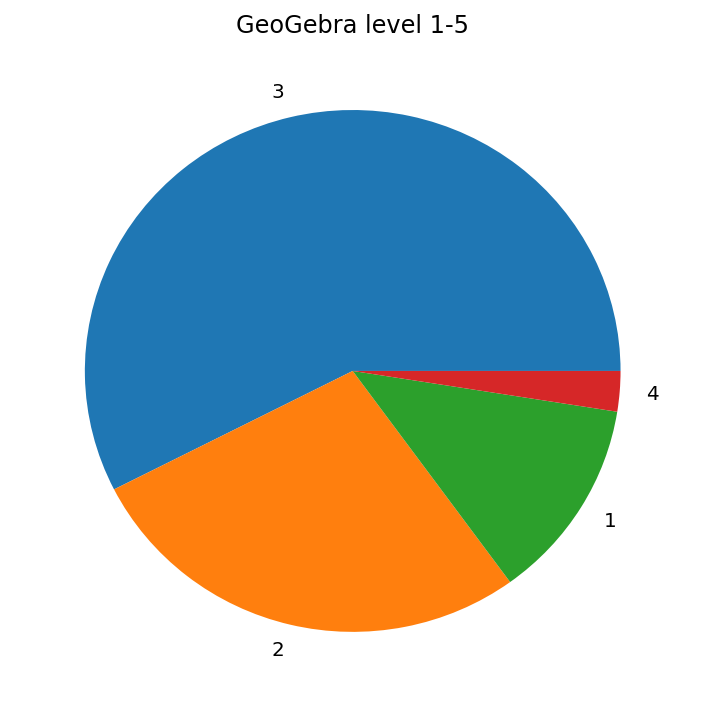

In [23]:
plt.figure(figsize=(6,6))
geogebra.iloc[:,5] = geogebra.iloc[:,5].astype(int) # convert to int
ax = geogebra.iloc[:,5].value_counts().plot(kind='pie');
ax.set_title("GeoGebra level 1-5")
ax.set_ylabel("");

### Participants institution

In [13]:
geogebra.iloc[:,2].value_counts()

Enseignant du second degré    33
Enseignant-chercheur           3
Doctorant                      2
Autre                          2
Name: Quel est votre fonction ?, dtype: int64

### display participants remarks

In [14]:
remarks = geogebra.iloc[:,6]
remarks = remarks.dropna()

In [21]:
with open('remarks.md','w') as f:
    for i, line in enumerate(remarks.values):
        line = line.strip().replace("\n","")
        f.write(str(i)+'. '+line+'\n')

0. Fabriquer des animations, faire de la programmation avec GeoGebra...
1. En savoir plus !
2. geom espace term S et surfaces z = f(x,y)
3. Je ne pourrai pas être présente le matin, j'arriverai vers 13 h 30.
4. J'utilise GeoGebra pour mes préparations de cours et aussi avec les élèves. Je pense avoir des utilisations très basiques de GeoGebra et j'espère pouvoir découvrir davantage ses possibilités.
5. Utiliser le tableur, faire des  calculs formels, et des figures dans l'espace.
6. Je souhaiterai voir différentes utilisations de GeoGebra pour les fonctions, les listes ( suites définies par récurrence : représentation graphique par exemple...)
7. Pas d'attentes particulières. J'aime bien ce logiciel, mais je pense que je n'utilise que très peu de fonctionnalités....Je voudrais découvrir des nouvelles fonctions et des nouvelles idées pour enrichir mon utilisation en classe (lycée)Par ailleurs, je prépare l'agrégation interne de maths. Pour les épreuves orales, le jury apprécie que les candidats illustrent leurs leçons par des animations logicielles (géogébra, python, scilab, xcas....). Plus je connaitrais Géogébra, et plus j'aurais des idées pour illustrer mes leçons d'oral. Voilà une deuxième motivation pour venir à cette journée.
8. Acquisitions de nouvelles méthodes éventuellement rapides
9. Les applications de Géogébra pour concevoir les cours, et les activités.
10. Connaitre plus les fonctions de calcul formel, de probabilités et de 3D
11. Utiliser Géogébra pour la géométrie dans l'espace.
12. Géométrie dans l'espace.
13. Utilisation de Géogébra en première et terminale.
14. Travailler sur la géométrie dans l’espace.
15. Étudier ce que l on peut faire d un point de vue pédagogique avec les élèves pour conjecturer/démontrer . Travailler avec des commandes cachées.  Apprendre à utiliser le curseur. Mieux connaître l outil geogebra pour l utiliser dzns la création de mes cours.
16. Me sentir plus à l’aise lorsque je propose une activité geogebra aux élèves.
17. Yes
18. Utilisation des outils "avancés" : calcul formel, tableur Lien entre ces outils "avancés"Possibilité (ou non) d'exploiter une figure geogebra dans une page HTML en tant qu'applet (ce qui était possible dans les anciennes versions en .jar) sans être forcé de l'héberger sur GeogebraTubeSi oui : quelle interaction avec les paramètres prédéfinis ?
19. Voir toutes les fonctionnalités de Géogebra pour faire des animations en classe ou pour utiliser avec les élèves. ( Lycee)
20. Insérer des images.Créer des animations.Géogébra 3D
21. Géométrie dans l'espace nivea
